In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
import fitsio
import matplotlib.pyplot as plt

---------------
## HSC-DR1 footprint

In [49]:
cat = Table.read('/Users/roz18/Documents/Data/desi-truth-table/hsc-dr1/hsc_footprint_wide.fits')
print(len(cat))

# idx = np.random.choice(len(cat), size=1000, replace=False)
# t = Table()
# t['ra'] = cat['ra'][idx]
# t['dec'] = cat['dec'][idx]
# t.write('/Users/roz18/Documents/Data/desi-truth-table/hst-dr1/hsc-wide-fewer.fits')

208047


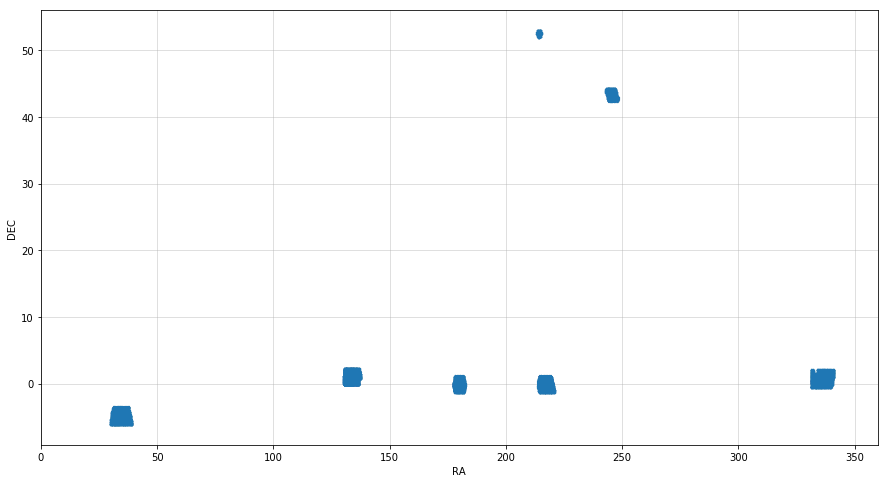

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(cat['ra'], cat['dec'], '.', markersize=0.3, alpha=0.5)
# plt.plot(t['ra'], t['dec'], '.', markersize=1, alpha=1, color='r')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.xlim(0, 360)
plt.grid(alpha=0.5)
plt.show()

In [50]:
cat = Table.read('/Users/roz18/Documents/Data/desi-truth-table/hsc-dr1/hsc_footprint_deep.fits')
print(len(cat))

# idx = np.random.choice(len(cat), size=1000, replace=False)
# t = Table()
# t['ra'] = cat['ra'][idx]
# t['dec'] = cat['dec'][idx]
# t.write('/Users/roz18/Downloads/hsc-deep-fewer.fits')

42279


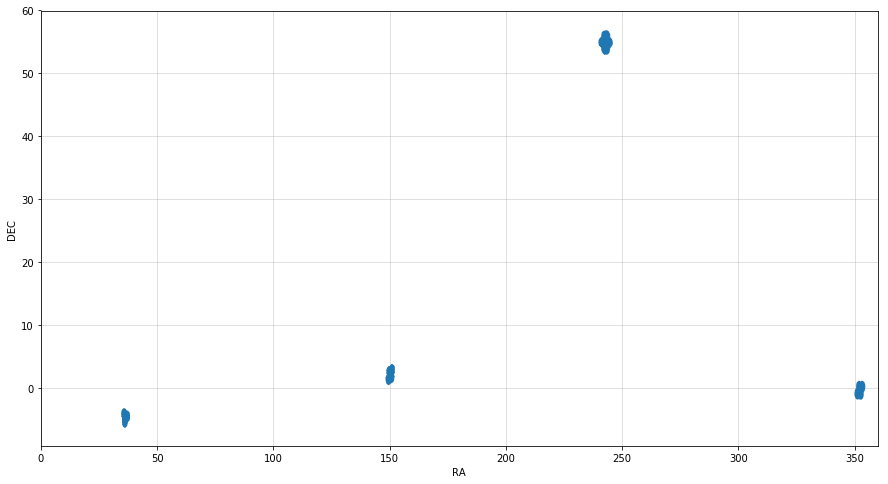

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(cat['ra'], cat['dec'], '.', markersize=0.3, alpha=0.5)
# plt.plot(t['ra'], t['dec'], '.', markersize=1, alpha=1, color='r')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.xlim(0, 360)
plt.grid(alpha=0.5)
plt.show()

In [51]:
cat = Table.read('/Users/roz18/Documents/Data/desi-truth-table/hsc-dr1/hsc_footprint_udeep.fits')
print(len(cat))

6290


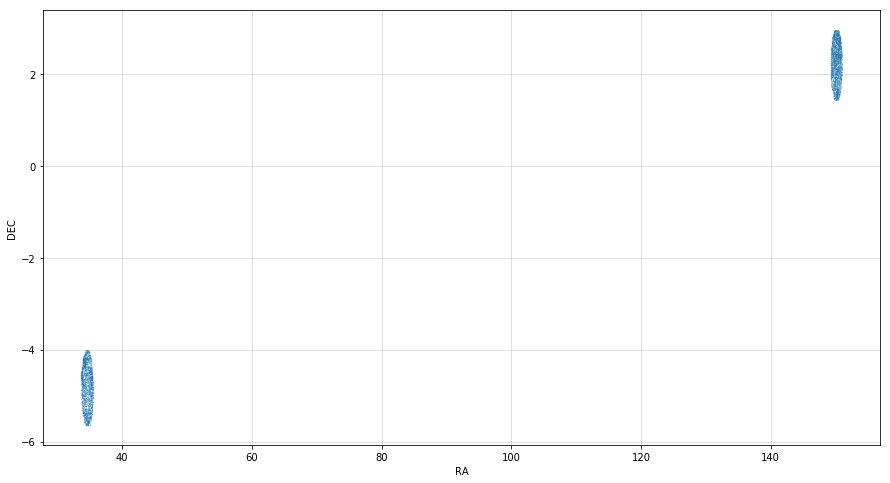

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(cat['ra'], cat['dec'], '.', markersize=0.3, alpha=0.5)
# plt.xlim(0, 360)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.grid(alpha=0.5)
plt.show()

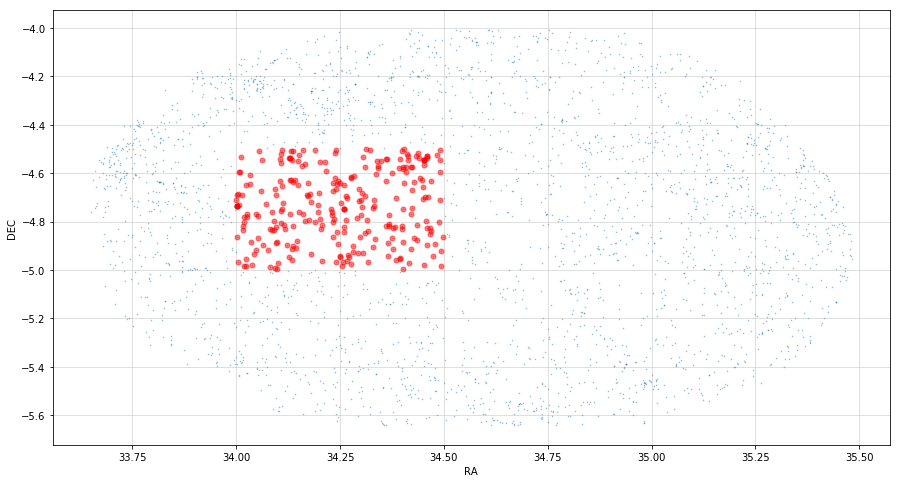

In [43]:
mask = (cat['ra']<60)
mask1 = (cat['ra']>34.) & (cat['ra']<34.5) & (cat['dec']>-5.0) & (cat['dec']<-4.5)

plt.figure(figsize=(15, 8))
plt.plot(cat['ra'][mask], cat['dec'][mask], '.', markersize=1, alpha=0.5)
plt.plot(cat['ra'][mask1], cat['dec'][mask1], 'r.', markersize=10, alpha=0.5)
# plt.xlim(0, 360)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.grid(alpha=0.5)
plt.show()

t = Table()
t['ra'] = cat['ra'][mask1]
t['dec'] = cat['dec'][mask1]
t.write('/Users/roz18/Downloads/temp.fits')

------------
## Testing

In [61]:
cat = Table.read('/Users/roz18/Documents/Data/desi-truth-table/hsc-dr1/udeep_small_region.fits')
print(len(cat))

colnames = cat.colnames
for colname in colnames:
    if colname.endswith('_isnull'):
        cat.remove_column(colname)

124058


In [62]:
cat.colnames

['object_id',
 'ra',
 'dec',
 'gflux_psf',
 'rflux_psf',
 'iflux_psf',
 'zflux_psf',
 'yflux_psf',
 'gflux_psf_err',
 'rflux_psf_err',
 'iflux_psf_err',
 'zflux_psf_err',
 'yflux_psf_err',
 'gcmodel_flux',
 'rcmodel_flux',
 'icmodel_flux',
 'zcmodel_flux',
 'ycmodel_flux',
 'gcmodel_flux_err',
 'rcmodel_flux_err',
 'icmodel_flux_err',
 'zcmodel_flux_err',
 'ycmodel_flux_err',
 'gclassification_extendedness',
 'rclassification_extendedness',
 'zclassification_extendedness',
 'zshape_sdss_11',
 'zshape_sdss_22',
 'zshape_sdss_12',
 'gcentroid_sdss_flags',
 'rcentroid_sdss_flags',
 'icentroid_sdss_flags',
 'zcentroid_sdss_flags',
 'ycentroid_sdss_flags',
 'gflags_pixel_interpolated_center',
 'rflags_pixel_interpolated_center',
 'iflags_pixel_interpolated_center',
 'zflags_pixel_interpolated_center',
 'yflags_pixel_interpolated_center',
 'gflags_pixel_saturated_center',
 'rflags_pixel_saturated_center',
 'iflags_pixel_saturated_center',
 'zflags_pixel_saturated_center',
 'yflags_pixel_satu

In [80]:
# idx = np.random.choice(len(cat), size=3000, replace=False)
# t = Table()
# t['ra'] = cat['ra'][idx]
# t['dec'] = cat['dec'][idx]
# t.write('/Users/roz18/Downloads/temp1.fits')

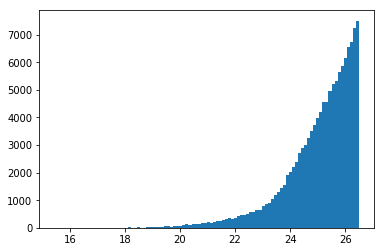

In [83]:
rcmodel_mag = -2.5*np.log10(cat['rcmodel_flux']) - 48.600

mask = np.isfinite(rcmodel_mag)
plt.hist(rcmodel_mag[mask], 100)
plt.show()

mask = rcmodel_mag>25.5
idx = np.random.choice(np.sum(mask), size=3000, replace=False)
t = Table()
t['ra'] = cat['ra'][mask][idx]
t['dec'] = cat['dec'][mask][idx]
t.write('/Users/roz18/Downloads/temp2.fits')

__Verify flux-to-magnitude conversion__

In [70]:
rmag_psf = -2.5*np.log10(cat['rflux_psf']) - 48.600

rmag_psf_diff = (rmag_psf - cat['rmag_psf'])
mask = np.isfinite(cat['rmag_psf'])
print(np.max(rmag_psf_diff[mask]))
print(np.min(rmag_psf_diff[mask]))
# plt.hist(rmag_psf)
# plt.show()

1.5106842496948047e-06
-1.5173474352536687e-06


/Users/roz18/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


__Verify flux-error-to-magnitude-error conversion__

In [95]:
rmag_psf_err = 2.5/np.log(10) * (cat['rflux_psf_err']/cat['rflux_psf'])

mask = np.isfinite(cat['rmag_psf_err'])
print(np.max((rmag_psf_err - cat['rmag_psf_err'])[mask]))
print(np.min((rmag_psf_err - cat['rmag_psf_err'])[mask]))

9.989711742264262e-06
-8.738352335058153e-07


-----------
## Matched catalogs

Conversion of extinction coefficients

In [32]:
decals = Table.read('/Users/roz18/Desktop/test/decals-dr5.0-hsc_temp-trim.fits')
hsc = Table.read('/Users/roz18/Desktop/test/hsc_temp-trim.fits')

colnames = hsc.colnames
for colname in colnames:
    if colname.endswith('_isnull'):
        hsc.remove_column(colname)

print(len(decals))

99423


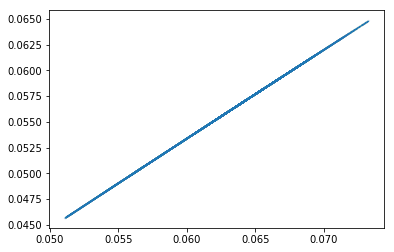

In [62]:
plt.plot(hsc['a_g'], 1-decals['MW_TRANSMISSION_G'], '.', markersize=0.1)
plt.show()

In [87]:
a1_g, a0_g = np.polyfit((1-decals['MW_TRANSMISSION_G']), hsc['a_g'], 1)
hsc_a_g_predict = a1_g * (1-decals['MW_TRANSMISSION_G']) + a0_g
print('a_g = {:.6f} * (1 - MW_TRANSMISSION_G) {} {:.6f}'.format(a1_g, '+' if a0_g>0 else '-', np.abs(a0_g)))
print('Maximum residual:', np.abs(hsc_a_g_predict - hsc['a_g']).max())

a1_r, a0_r = np.polyfit((1-decals['MW_TRANSMISSION_G']), hsc['a_r'], 1)
hsc_a_r_predict = a1_r * (1-decals['MW_TRANSMISSION_G']) + a0_r
print('a_g = {:.6f} * (1 - MW_TRANSMISSION_G) {} {:.6f}'.format(a1_g, '+' if a0_r>0 else '-', np.abs(a0_g)))
print('Maximum residual:', np.abs(hsc_a_r_predict - hsc['a_r']).max())

a1_i, a0_i = np.polyfit((1-decals['MW_TRANSMISSION_G']), hsc['a_i'], 1)
hsc_a_i_predict = a1_i * (1-decals['MW_TRANSMISSION_G']) + a0_i
print('a_i = {:.6f} * (1 - MW_TRANSMISSION_G) {} {:.6f}'.format(a1_i, '+' if a0_i>0 else '-', np.abs(a0_i)))
print('Maximum residual:', np.abs(hsc_a_i_predict - hsc['a_i']).max())

a1_z, a0_z = np.polyfit((1-decals['MW_TRANSMISSION_G']), hsc['a_z'], 1)
hsc_a_z_predict = a1_z * (1-decals['MW_TRANSMISSION_G']) + a0_z
print('a_z = {:.6f} * (1 - MW_TRANSMISSION_G) {} {:.6f}'.format(a1_z, '+' if a0_z>0 else '-', np.abs(a0_z)))
print('Maximum residual:', np.abs(hsc_a_z_predict - hsc['a_z']).max())

a1_y, a0_y = np.polyfit((1-decals['MW_TRANSMISSION_G']), hsc['a_y'], 1)
hsc_a_y_predict = a1_y * (1-decals['MW_TRANSMISSION_G']) + a0_y
print('a_y = {:.6f} * (1 - MW_TRANSMISSION_G) {} {:.6f}'.format(a1_y, '+' if a0_y>0 else '-', np.abs(a0_y)))
print('Maximum residual:', np.abs(hsc_a_y_predict - hsc['a_y']).max())

a_g = 1.155636 * (1 - MW_TRANSMISSION_G) - 0.001767
Maximum residual: 5.9626997e-05
a_g = 1.155636 * (1 - MW_TRANSMISSION_G) - 0.001767
Maximum residual: 4.2248517e-05
a_i = 0.584431 * (1 - MW_TRANSMISSION_G) - 0.000893
Maximum residual: 3.01525e-05
a_z = 0.450745 * (1 - MW_TRANSMISSION_G) - 0.000689
Maximum residual: 2.3256987e-05
a_y = 0.384616 * (1 - MW_TRANSMISSION_G) - 0.000588
Maximum residual: 1.9840896e-05


-----------
## Matched catalogs

Decide where to place the magnitude limit

__COSMOS region:__

In [16]:
decals = Table.read('/Users/roz18/Desktop/test/decals-dr5.0-hsc_temp-trim.fits')
hsc = Table.read('/Users/roz18/Desktop/test/hsc_temp-trim.fits')
hsc_all = Table.read('/Users/roz18/Desktop/test/hsc_temp.fits')

colnames = hsc.colnames
for colname in colnames:
    if colname.endswith('_isnull'):
        hsc.remove_column(colname)
        hsc_all.remove_column(colname)

######## COSMOS region ########
mask = hsc['ra']>140
decals = decals[mask]
hsc = hsc[mask]
mask = hsc_all['ra']>140
hsc_all = hsc_all[mask]

print(len(decals))

43656


In [17]:
# select objects with clean photometry
mask = (~hsc['gcentroid_sdss_flags']) & (~hsc['rcentroid_sdss_flags']) & (~hsc['icentroid_sdss_flags']) & (~hsc['zcentroid_sdss_flags']) & (~hsc['ycentroid_sdss_flags']) & (~hsc['gflags_pixel_interpolated_center']) & (~hsc['rflags_pixel_interpolated_center']) & (~hsc['iflags_pixel_interpolated_center']) & (~hsc['zflags_pixel_interpolated_center']) & (~hsc['yflags_pixel_interpolated_center']) & (~hsc['gflags_pixel_saturated_center']) & (~hsc['rflags_pixel_saturated_center']) & (~hsc['iflags_pixel_saturated_center']) & (~hsc['zflags_pixel_saturated_center']) & (~hsc['yflags_pixel_saturated_center'])
print('fraction of bad objects:', np.sum(~mask)/len(hsc))
decals = decals[mask]
hsc = hsc[mask]
print(len(decals))

mask = (~hsc_all['gcentroid_sdss_flags']) & (~hsc_all['rcentroid_sdss_flags']) & (~hsc_all['icentroid_sdss_flags']) & (~hsc_all['zcentroid_sdss_flags']) & (~hsc_all['ycentroid_sdss_flags']) & (~hsc_all['gflags_pixel_interpolated_center']) & (~hsc_all['rflags_pixel_interpolated_center']) & (~hsc_all['iflags_pixel_interpolated_center']) & (~hsc_all['zflags_pixel_interpolated_center']) & (~hsc_all['yflags_pixel_interpolated_center']) & (~hsc_all['gflags_pixel_saturated_center']) & (~hsc_all['rflags_pixel_saturated_center']) & (~hsc_all['iflags_pixel_saturated_center']) & (~hsc_all['zflags_pixel_saturated_center']) & (~hsc_all['yflags_pixel_saturated_center'])
print('fraction of bad objects:', np.sum(~mask)/len(hsc_all))
hsc_all = hsc_all[mask]

fraction of bad objects: 0.015713762140370166
42970
fraction of bad objects: 0.09579090188426123


In [18]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    decals['gmag'] = 22.5 - 2.5*np.log10(decals['FLUX_G'])
    decals['rmag'] = 22.5 - 2.5*np.log10(decals['FLUX_R'])
    decals['zmag'] = 22.5 - 2.5*np.log10(decals['FLUX_Z'])
    decals['w1mag'] = 22.5 - 2.5*np.log10(decals['FLUX_W1'])

    decals['gsnr'] = decals['FLUX_G'] * np.sqrt(decals['FLUX_IVAR_G'])
    decals['rsnr'] = decals['FLUX_R'] * np.sqrt(decals['FLUX_IVAR_R'])
    decals['zsnr'] = decals['FLUX_Z'] * np.sqrt(decals['FLUX_IVAR_Z'])
    decals['w1snr'] = decals['FLUX_W1'] * np.sqrt(decals['FLUX_IVAR_W1'])

    hsc['gmag'] = -2.5*np.log10(hsc['gcmodel_flux']) - 48.600
    hsc['rmag'] = -2.5*np.log10(hsc['rcmodel_flux']) - 48.600
    hsc['imag'] = -2.5*np.log10(hsc['icmodel_flux']) - 48.600
    hsc['zmag'] = -2.5*np.log10(hsc['zcmodel_flux']) - 48.600
    hsc['ymag'] = -2.5*np.log10(hsc['ycmodel_flux']) - 48.600
    
    hsc['gsnr'] = hsc['gcmodel_flux'] / hsc['gcmodel_flux_err']
    hsc['rsnr'] = hsc['rcmodel_flux'] / hsc['rcmodel_flux_err']
    hsc['zsnr'] = hsc['zcmodel_flux'] / hsc['zcmodel_flux_err']
    
    decals['rdepth'] = -2.5*(np.log10((5/np.sqrt(decals['GALDEPTH_R'])))-9)

In [19]:
print('median r-band depth:')
print(np.median(decals['rdepth']))

median r-band depth:
24.638853


/Users/roz18/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


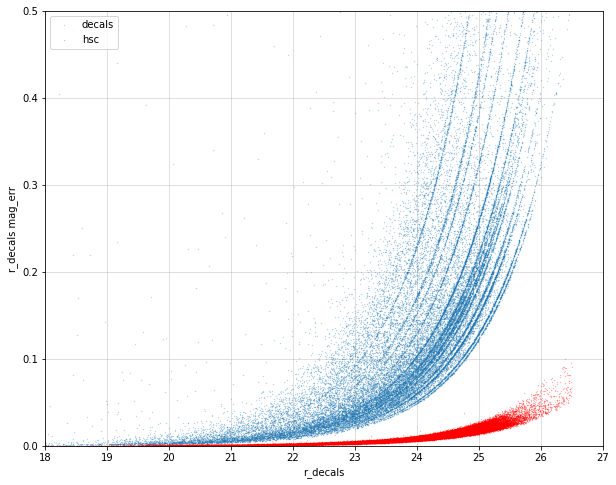

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(decals['rmag'], 1/decals['rsnr'], '.', markersize=0.5, alpha=0.5, label='decals')
plt.plot(hsc['rmag'], 1/hsc['rsnr'], 'r.', markersize=0.5, alpha=0.5, label='hsc')
plt.xlabel('r_decals')
plt.ylabel('r_decals mag_err')
plt.axis([18, 27, 0, 0.5])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

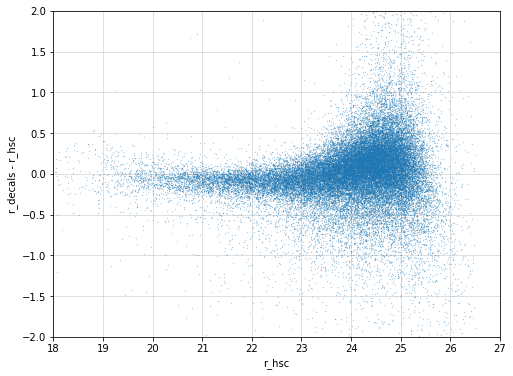

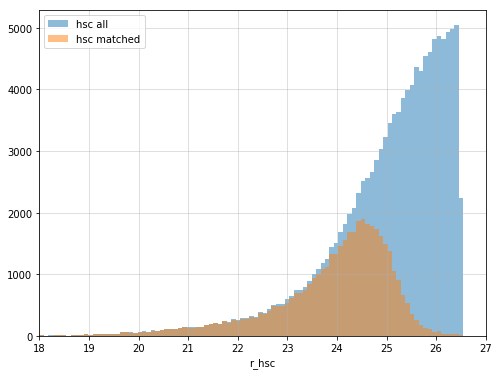

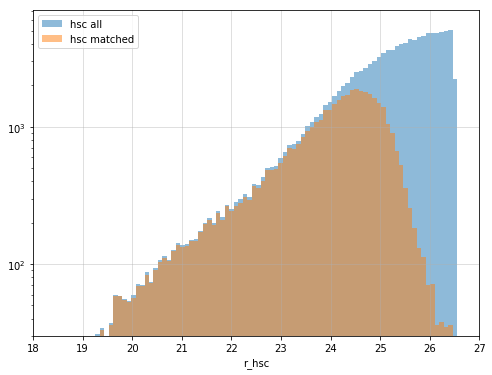

In [21]:
mask = (np.isfinite(hsc['rmag'])) & (np.isfinite(decals['rmag']))
plt.figure(figsize=(8, 6))
plt.plot(hsc['rmag'][mask], (decals['rmag']-hsc['rmag'])[mask], '.', markersize=0.5, alpha=0.6)
plt.xlabel('r_hsc')
plt.ylabel('r_decals - r_hsc')
plt.axis([18, 27, -2, 2])
plt.grid(alpha=0.5)
plt.show()

rmag_hsc_all = -2.5*np.log10(hsc_all['rcmodel_flux']) - 48.600

plt.figure(figsize=(8, 6))
mask = np.isfinite(rmag_hsc_all)
plt.hist(rmag_hsc_all, 100, range=(18, 27), alpha=0.5, label='hsc all')
mask = np.isfinite(hsc['rmag'])
plt.hist(hsc['rmag'][mask], 100, range=(18, 27), alpha=0.5, label='hsc matched')
plt.xlabel('r_hsc')
plt.xlim(18, 27)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
mask = np.isfinite(rmag_hsc_all)
plt.hist(rmag_hsc_all, 100, range=(18, 27), alpha=0.5, label='hsc all')
mask = np.isfinite(hsc['rmag'])
plt.hist(hsc['rmag'][mask], 100, range=(18, 27), alpha=0.5, label='hsc matched')
plt.xlabel('r_hsc')
plt.xlim(18, 27)
plt.legend()
plt.grid(alpha=0.5)
plt.yscale('log')
plt.ylim(ymin=30)
plt.show()

__Not COSMOS region:__

In [22]:
decals = Table.read('/Users/roz18/Desktop/test/decals-dr5.0-hsc_temp-trim.fits')
hsc = Table.read('/Users/roz18/Desktop/test/hsc_temp-trim.fits')
hsc_all = Table.read('/Users/roz18/Desktop/test/hsc_temp.fits')

colnames = hsc.colnames
for colname in colnames:
    if colname.endswith('_isnull'):
        hsc.remove_column(colname)
        hsc_all.remove_column(colname)

######## Not COSMOS region ########
mask = hsc['ra']<140
decals = decals[mask]
hsc = hsc[mask]
mask = hsc_all['ra']<140
hsc_all = hsc_all[mask]

print(len(decals))

55767


In [23]:
# select objects with clean photometry
mask = (~hsc['gcentroid_sdss_flags']) & (~hsc['rcentroid_sdss_flags']) & (~hsc['icentroid_sdss_flags']) & (~hsc['zcentroid_sdss_flags']) & (~hsc['ycentroid_sdss_flags']) & (~hsc['gflags_pixel_interpolated_center']) & (~hsc['rflags_pixel_interpolated_center']) & (~hsc['iflags_pixel_interpolated_center']) & (~hsc['zflags_pixel_interpolated_center']) & (~hsc['yflags_pixel_interpolated_center']) & (~hsc['gflags_pixel_saturated_center']) & (~hsc['rflags_pixel_saturated_center']) & (~hsc['iflags_pixel_saturated_center']) & (~hsc['zflags_pixel_saturated_center']) & (~hsc['yflags_pixel_saturated_center'])
print('fraction of bad objects:', np.sum(~mask)/len(hsc))
decals = decals[mask]
hsc = hsc[mask]
print(len(decals))

mask = (~hsc_all['gcentroid_sdss_flags']) & (~hsc_all['rcentroid_sdss_flags']) & (~hsc_all['icentroid_sdss_flags']) & (~hsc_all['zcentroid_sdss_flags']) & (~hsc_all['ycentroid_sdss_flags']) & (~hsc_all['gflags_pixel_interpolated_center']) & (~hsc_all['rflags_pixel_interpolated_center']) & (~hsc_all['iflags_pixel_interpolated_center']) & (~hsc_all['zflags_pixel_interpolated_center']) & (~hsc_all['yflags_pixel_interpolated_center']) & (~hsc_all['gflags_pixel_saturated_center']) & (~hsc_all['rflags_pixel_saturated_center']) & (~hsc_all['iflags_pixel_saturated_center']) & (~hsc_all['zflags_pixel_saturated_center']) & (~hsc_all['yflags_pixel_saturated_center'])
print('fraction of bad objects:', np.sum(~mask)/len(hsc_all))
hsc_all = hsc_all[mask]

fraction of bad objects: 0.02311402800939624
54478
fraction of bad objects: 0.13741620199235638


In [24]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    decals['gmag'] = 22.5 - 2.5*np.log10(decals['FLUX_G'])
    decals['rmag'] = 22.5 - 2.5*np.log10(decals['FLUX_R'])
    decals['zmag'] = 22.5 - 2.5*np.log10(decals['FLUX_Z'])
    decals['w1mag'] = 22.5 - 2.5*np.log10(decals['FLUX_W1'])

    decals['gsnr'] = decals['FLUX_G'] * np.sqrt(decals['FLUX_IVAR_G'])
    decals['rsnr'] = decals['FLUX_R'] * np.sqrt(decals['FLUX_IVAR_R'])
    decals['zsnr'] = decals['FLUX_Z'] * np.sqrt(decals['FLUX_IVAR_Z'])
    decals['w1snr'] = decals['FLUX_W1'] * np.sqrt(decals['FLUX_IVAR_W1'])

    hsc['gmag'] = -2.5*np.log10(hsc['gcmodel_flux']) - 48.600
    hsc['rmag'] = -2.5*np.log10(hsc['rcmodel_flux']) - 48.600
    hsc['imag'] = -2.5*np.log10(hsc['icmodel_flux']) - 48.600
    hsc['zmag'] = -2.5*np.log10(hsc['zcmodel_flux']) - 48.600
    hsc['ymag'] = -2.5*np.log10(hsc['ycmodel_flux']) - 48.600
    
    hsc['gsnr'] = hsc['gcmodel_flux'] / hsc['gcmodel_flux_err']
    hsc['rsnr'] = hsc['rcmodel_flux'] / hsc['rcmodel_flux_err']
    hsc['zsnr'] = hsc['zcmodel_flux'] / hsc['zcmodel_flux_err']
    
    decals['rdepth'] = -2.5*(np.log10((5/np.sqrt(decals['GALDEPTH_R'])))-9)

In [25]:
print('median r-band depth:')
print(np.median(decals['rdepth']))

median r-band depth:
24.703156


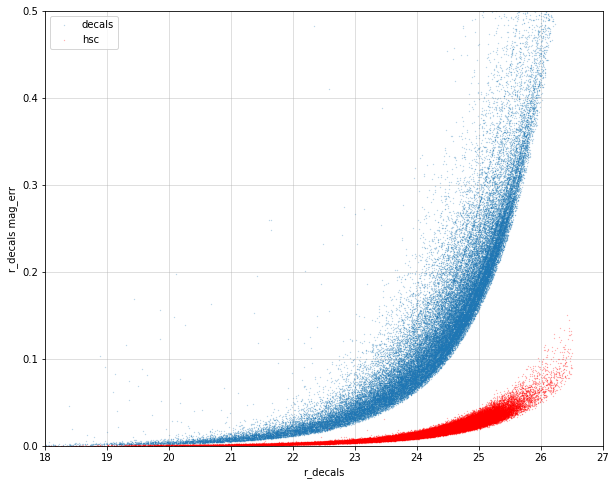

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(decals['rmag'], 1/decals['rsnr'], '.', markersize=0.5, alpha=0.5, label='decals')
plt.plot(hsc['rmag'], 1/hsc['rsnr'], 'r.', markersize=0.5, alpha=0.5, label='hsc')
plt.xlabel('r_decals')
plt.ylabel('r_decals mag_err')
plt.axis([18, 27, 0, 0.5])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

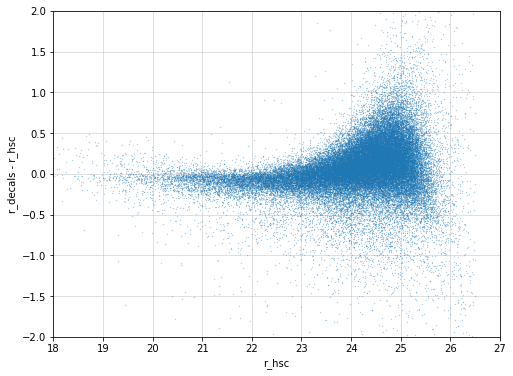

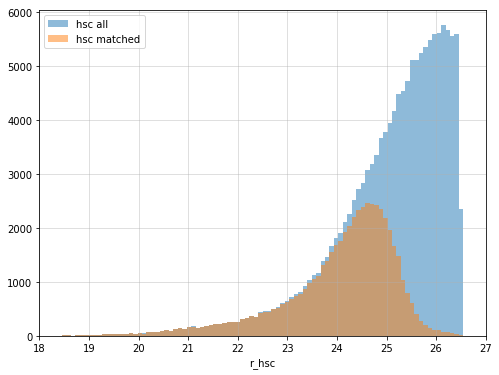

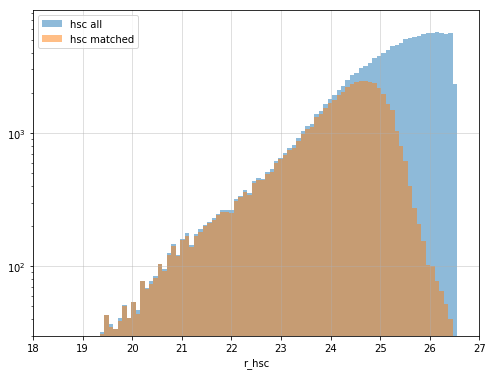

In [27]:
mask = (np.isfinite(hsc['rmag'])) & (np.isfinite(decals['rmag']))
plt.figure(figsize=(8, 6))
plt.plot(hsc['rmag'][mask], (decals['rmag']-hsc['rmag'])[mask], '.', markersize=0.5, alpha=0.6)
plt.xlabel('r_hsc')
plt.ylabel('r_decals - r_hsc')
plt.axis([18, 27, -2, 2])
plt.grid(alpha=0.5)
plt.show()

rmag_hsc_all = -2.5*np.log10(hsc_all['rcmodel_flux']) - 48.600

plt.figure(figsize=(8, 6))
mask = np.isfinite(rmag_hsc_all)
plt.hist(rmag_hsc_all, 100, range=(18, 27), alpha=0.5, label='hsc all')
mask = np.isfinite(hsc['rmag'])
plt.hist(hsc['rmag'][mask], 100, range=(18, 27), alpha=0.5, label='hsc matched')
plt.xlabel('r_hsc')
plt.xlim(18, 27)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

plt.figure(figsize=(8, 6))
mask = np.isfinite(rmag_hsc_all)
plt.hist(rmag_hsc_all, 100, range=(18, 27), alpha=0.5, label='hsc all')
mask = np.isfinite(hsc['rmag'])
plt.hist(hsc['rmag'][mask], 100, range=(18, 27), alpha=0.5, label='hsc matched')
plt.xlabel('r_hsc')
plt.xlim(18, 27)
plt.legend()
plt.grid(alpha=0.5)
plt.yscale('log')
plt.ylim(ymin=30)
plt.show()

In [28]:
# mask = hsc['rmag']>25.5
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=100, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table1.txt', format='ascii.commented_header')

# mask = (hsc['rmag']>25.) & (hsc['rmag']<25.5)
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=100, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table2.txt', format='ascii.commented_header')

# mask = (hsc['rmag']>24.5) & (hsc['rmag']<25.)
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=100, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table3.txt', format='ascii.commented_header')

# mask = (hsc['rmag']>24.) & (hsc['rmag']<24.5)
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=100, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table4.txt', format='ascii.commented_header')

In [345]:
# mask = hsc['rmag']>25.5
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=1000, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table1.fits')

# mask = (hsc['rmag']>25.) & (hsc['rmag']<25.5)
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=1000, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table2.fits')

# mask = (hsc['rmag']>24.5) & (hsc['rmag']<25.)
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=1000, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table3.fits')

# mask = (hsc['rmag']>24.) & (hsc['rmag']<24.5)
# print(np.sum(mask))
# idx = np.random.choice(np.sum(mask), size=1000, replace=False)
# t = Table()
# t['ra'] = hsc['ra'][mask][idx]
# t['dec'] = hsc['dec'][mask][idx]
# t.write('/Users/roz18/Downloads/hsc_table4.fits')

-------
## Estimate file sizes

All 20570477 objects
 File size in MB: 6008.43
r<25  67.57%
 File size in MB: 4059.80
r<24.5  44.53%
 File size in MB: 2675.36


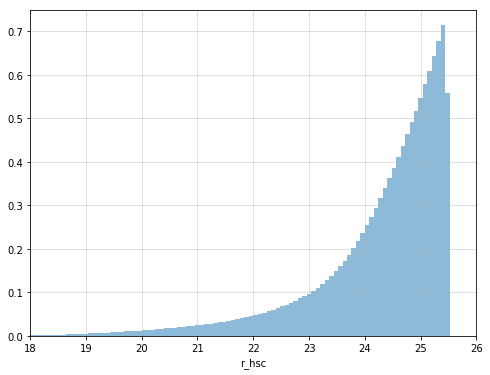

In [116]:
cat = Table.read('/Users/roz18/Downloads/hsc_number_of_objects_wide.fits')
print('All', len(cat), 'objects')
print(' File size in MB: {:.2f}'.format(20./68472*len(cat)))
mask = cat['rcmodel_mag']<25
print('r<25  {:.2f}%'.format(np.sum(mask)/len(cat)*100))
print(' File size in MB: {:.2f}'.format(20./68472*np.sum(mask)))
mask = cat['rcmodel_mag']<24.5
print('r<24.5  {:.2f}%'.format(np.sum(mask)/len(cat)*100))
print(' File size in MB: {:.2f}'.format(20./68472*np.sum(mask)))

plt.figure(figsize=(8, 6))
plt.hist(cat['rcmodel_mag'], 100, range=(18, 26), alpha=0.5, normed=True)
plt.xlabel('r_hsc')
plt.xlim(18, 26)
plt.grid(alpha=0.5)
plt.show()

All 5440910 objects
 File size in MB: 1589.24
r<25  67.29%
 File size in MB: 1069.43
r<24.5  43.83%
 File size in MB: 696.59


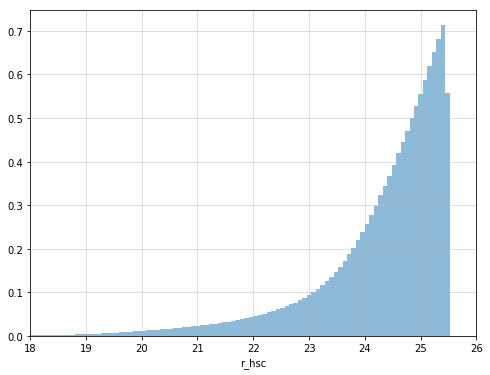

In [117]:
cat = Table.read('/Users/roz18/Downloads/hsc_number_of_objects_deep.fits')
print('All', len(cat), 'objects')
print(' File size in MB: {:.2f}'.format(20./68472*len(cat)))
mask = cat['rcmodel_mag']<25
print('r<25  {:.2f}%'.format(np.sum(mask)/len(cat)*100))
print(' File size in MB: {:.2f}'.format(20./68472*np.sum(mask)))
mask = cat['rcmodel_mag']<24.5
print('r<24.5  {:.2f}%'.format(np.sum(mask)/len(cat)*100))
print(' File size in MB: {:.2f}'.format(20./68472*np.sum(mask)))

plt.figure(figsize=(8, 6))
plt.hist(cat['rcmodel_mag'], 100, range=(18, 26), alpha=0.5, normed=True)
plt.xlabel('r_hsc')
plt.xlim(18, 26)
plt.grid(alpha=0.5)
plt.show()

All 844744 objects
 File size in MB: 246.74
r<25  67.72%
 File size in MB: 167.09
r<24.5  44.08%
 File size in MB: 108.75


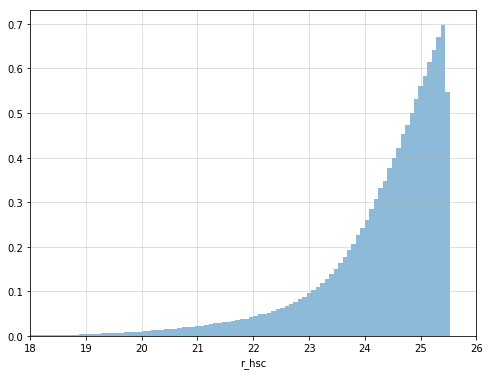

In [131]:
cat = Table.read('/Users/roz18/Downloads/hsc_number_of_objects_udeep.fits')
print('All', len(cat), 'objects')
print(' File size in MB: {:.2f}'.format(20./68472*len(cat)))
mask = cat['rcmodel_mag']<25
print('r<25  {:.2f}%'.format(np.sum(mask)/len(cat)*100))
print(' File size in MB: {:.2f}'.format(20./68472*np.sum(mask)))
mask = cat['rcmodel_mag']<24.5
print('r<24.5  {:.2f}%'.format(np.sum(mask)/len(cat)*100))
print(' File size in MB: {:.2f}'.format(20./68472*np.sum(mask)))

plt.figure(figsize=(8, 6))
plt.hist(cat['rcmodel_mag'], 100, range=(18, 26), alpha=0.5, normed=True)
plt.xlabel('r_hsc')
plt.xlim(18, 26)
plt.grid(alpha=0.5)
plt.show()

__"Size" catalog:__

In [126]:
cat = Table.read('/Users/roz18/Downloads/hsc_file_size.fits')
colnames = cat.colnames
for colname in colnames:
    if colname.endswith('_isnull'):
        cat.remove_column(colname)

print(len(cat))

68472


In [127]:
cat

object_id,ra,dec,gflux_psf,rflux_psf,iflux_psf,zflux_psf,yflux_psf,gflux_psf_err,rflux_psf_err,iflux_psf_err,zflux_psf_err,yflux_psf_err,gcmodel_flux,rcmodel_flux,icmodel_flux,zcmodel_flux,ycmodel_flux,gcmodel_flux_err,rcmodel_flux_err,icmodel_flux_err,zcmodel_flux_err,ycmodel_flux_err,gclassification_extendedness,rclassification_extendedness,zclassification_extendedness,zshape_sdss_11,zshape_sdss_22,zshape_sdss_12,gcentroid_sdss_flags,rcentroid_sdss_flags,icentroid_sdss_flags,zcentroid_sdss_flags,ycentroid_sdss_flags,gflags_pixel_interpolated_center,rflags_pixel_interpolated_center,iflags_pixel_interpolated_center,zflags_pixel_interpolated_center,yflags_pixel_interpolated_center,gflags_pixel_saturated_center,rflags_pixel_saturated_center,iflags_pixel_saturated_center,zflags_pixel_saturated_center,yflags_pixel_saturated_center,photoz_mean,photoz_mode,photoz_median,photoz_best
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,float32,float32,float32,float32
43158451320266278,150.35611414742652,1.9021220918437547,2.2586177784911842e-30,5.710051727825485e-30,1.6133179655369665e-29,3.8730182719711816e-29,5.834204171871145e-29,7.318186746474306e-32,6.037431352188027e-32,9.145451699232429e-32,1.556276430007164e-31,3.3163266995186023e-31,3.0501308639908363e-30,8.316160097977838e-30,2.2309742975231646e-29,5.461228899009925e-29,7.530050761920259e-29,9.79030433007878e-32,8.382389648418209e-32,1.214193504721656e-31,2.0651180009069364e-31,4.17904675651981e-31,1.0,1.0,1.0,0.13599358,0.1437793,0.023122465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.2232344,1.25,1.2340453,1.22
43158451320266303,150.35893712016446,1.9026145145040605,2.4142442038811974e-30,3.739577029147601e-30,8.076329615747749e-30,1.1416818444869777e-29,1.3735809958089022e-29,7.32098982350919e-32,5.991503848179488e-32,8.579779777947169e-32,1.4211301309017236e-31,3.293443850028326e-31,2.643826176866585e-30,4.498500404031393e-30,9.484549420360934e-30,1.3651468705676726e-29,1.528952456947505e-29,8.071333844778781e-32,7.167161860576492e-32,1.0019523832362367e-31,1.6764386574510942e-31,3.687668810007694e-31,1.0,1.0,1.0,0.09486682,0.10302846,-0.002487946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.86413497,0.85999995,0.86143595,0.86
43158451320266308,150.39135288648586,1.902603966307369,1.7011087536606575e-30,2.4101406843161505e-30,3.8803802961328686e-30,3.537788409573325e-30,3.472167767381351e-30,6.960433857413429e-32,5.650397498126477e-32,8.524591144077738e-32,1.3916423435759314e-31,3.26793336234114e-31,1.8114865701818078e-30,2.687606381525996e-30,4.2685932775398486e-30,3.898826789599897e-30,3.8015949156131244e-30,7.485149470502245e-32,6.250655994431786e-32,9.395500919268046e-32,1.5258913836390649e-31,3.5605156106869195e-31,1.0,1.0,1.0,0.08721873,0.102739856,-0.020383285,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.67738885,0.68,0.6758453,0.67
43158451320266312,150.350030334873,1.9026590830876116,5.642232389393142e-31,1.825808141574523e-30,2.6879230289066757e-30,2.9426013647445085e-30,3.388805542572407e-30,6.971468240045243e-32,5.765182173622848e-32,8.551637536195907e-32,1.3711120551602667e-31,3.2395253041687053e-31,6.942325756825277e-31,2.831922952724628e-30,3.613965153482912e-30,4.274494059100954e-30,4.3754839942019285e-30,8.388726368910037e-32,8.53455411503776e-32,1.1135642396305968e-31,1.9416248364640133e-31,4.206264300114321e-31,1.0,1.0,1.0,0.09158672,0.121492386,-0.026984708,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.7239537,3.62,3.701685,3.71
43158451320266393,150.38632491395347,1.904569611413948,3.925387235001269e-31,1.3175263972071